<a href="https://colab.research.google.com/github/shrikantkute/Retail_Sales_Prediction/blob/main/Retail_Sales_Prediction_Shrikant_Kute.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Sales prediction for Rossmann store chain**



 **Project Type**    -  Machine Learning Linear Regression
 
 **Contribution**    - Individual

# **Project Summary -**

  Retail Sales Prediction is a regression machine learning project. Rossmann operates over 3,000 drug   stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied. You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

Businesses use sales forecasts to determine what revenue they will be generating in a particular timespan to empower themselves with powerful and strategic business plans. Important decisions such as budgets, hiring, incentives, goals, acquisitions and various other growth plans are affected by the revenue the company is going to make in the coming months and for these plans to be as effective as they are planned to be it is important for these forecasts to also be as good.



# **GitHub Link -**

# **Problem Statement -**


**Rossmann operates over 3,000 drug stores in 7 European countries. Currently,  Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied. You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.**

# **Business Objective -**

**The task is to forecast the "Sales" column for the test set and recommend ways in order to improve the numbers**.

# ***Let's Begin !***

## ***1. All about Data -***

###Importing Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams.update({'figure.figsize':(8,5),'figure.dpi':100})
from datetime import datetime
import datetime as dt

%matplotlib inline
sns.set_style('white')

import warnings    
warnings.filterwarnings('ignore')

from scipy.stats import ttest_ind
import math
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LassoLars
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import ElasticNet

### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Load Dataset
sales_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Regression Capstone Project/Rossmann Stores Data.csv')
stores_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Regression Capstone Project/store.csv')

### Dataset First View

In [4]:
# First look at the Sales data
sales_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
# First look at the Stores data
stores_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


### Dataset Rows & Columns Count

In [6]:
# Dataset Rows & Columns Count
sales_df.shape

(1017209, 9)

In [7]:
stores_df.shape

(1115, 10)

### Dataset Information

In [8]:
# Information about the sales dataset
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


This dataset contains 1017209 rows or observations and 9 columns. It appears to have no null values in it. It has integer, datetime and object as data types.

In [9]:
# Information about the stores dataset
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


There are 1115 rows and 10 columns, as we can see. It contains missing values, which must be imputed with appropriate values in order to produce good results later on.

### Duplicate values

In [10]:
# Dataset Duplicate Value Count
sales_df.duplicated().sum()

0

In [11]:
stores_df.duplicated().sum()

0

As we can see both datasets contain no duplicated values.

### Missing Values/Null Values

In [12]:
# Missing Values/Null Values Count
sales_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [13]:
stores_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

There are missing values in the following columns - 
* CompetitionDistance - Distance in meters to the nearest competitor store, the distribution plot would give us an idea about the distances at which generally the stores are opened and we would impute the values accordingly.
* CompetitionOpenSinceMonth - Gives the approximate month of the time the nearest competitor was opened, mode of the column would tell us the most occuring month.
* CompetitionOpenSinceYear - Gives the approximate year of the time the nearest competitor was opened, mode of the column would tell us the most occuring year.
* Promo2SinceWeek, Promo2SinceYear and PromoInterval are NaN wherever Promo2 is 0 or False as can be seen in the first look of the dataset. They can be replaced with 0. 

In [14]:
# Visualizing the missing values

Text(0.5, 0, 'Competition Distance Distribution Plot')

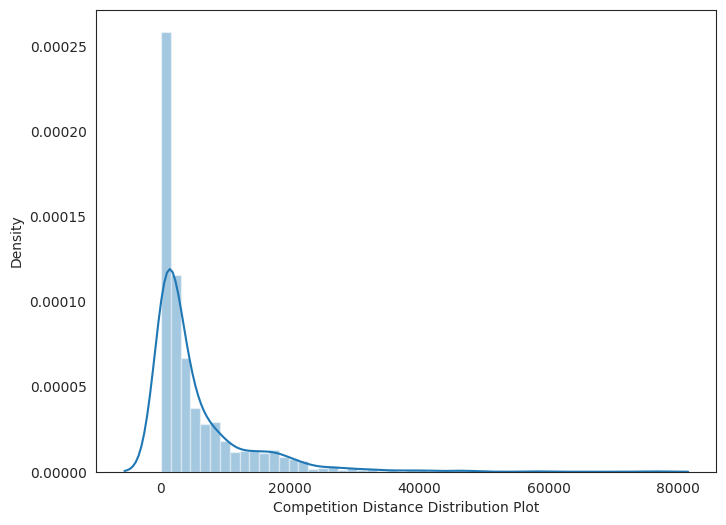

In [15]:
# Distribution plot of competiton distance
plt.rcParams['figure.figsize'] = (8, 6)

sns.distplot(x=stores_df['CompetitionDistance'], hist = True)
plt.xlabel('Competition Distance Distribution Plot')

It seems like most of the CompetitionDistance values are towards the left and the distribution is skewed on the right. Median is more robust to outlier effect.

In [16]:
# Filling Competition Distance with the Median value
stores_df['CompetitionDistance'].fillna(stores_df['CompetitionDistance'].median(), inplace = True)

In [17]:
# Filling Competition Open since Month and Year with the most occuring values of the columns i.e Modes of those columns
stores_df['CompetitionOpenSinceMonth'].fillna(stores_df['CompetitionOpenSinceMonth'].mode()[0], inplace = True)
stores_df['CompetitionOpenSinceYear'].fillna(stores_df['CompetitionOpenSinceYear'].mode()[0], inplace = True)

In [18]:
# Imputing the nan values of Promo2 related columns with 0
stores_df['Promo2SinceWeek'].fillna(value=0,inplace=True)
stores_df['Promo2SinceYear'].fillna(value=0,inplace=True)
stores_df['PromoInterval'].fillna(value=0,inplace=True)

In [19]:
# Checking
stores_df.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

### Merging the two datasets

In [20]:
# Merge the two datasets
df = sales_df.merge(right=stores_df, on="Store", how="left")

In [21]:
# First five rows of the merged dataset
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [22]:
# Shape of the merged dataframe
df.shape

(1017209, 18)

### What did you know about your dataset?

The dataset provided is a merged dataset containing information from two datasets: Rossman Store Sales and Store. It contains information about daily sales and store data for 1115 stores in Germany, from January 2013 to July 2015.

The columns in the dataset include:

Store: An integer indicating the store number.

DayOfWeek: ]An integer indicating the day of the week (1-7, where 1 is Sunday).

Date: The date in yyyy-mm-dd format.


Sales: The amount of sales for a given store on a given day (target variable).

Customers: The number of customers who visited the store on a given day.

Open: A binary variable indicating whether the store was open (1) or closed (0) on a given day.

Promo: A binary variable indicating whether a store was running a promotion on a given day.

StateHoliday: A categorical variable indicating whether a state holiday was in effect on a given day (0 = no, a = public holiday, b = Easter holiday, c = Christmas).

SchoolHoliday: A binary variable indicating whether a school holiday was in effect on a given day.

StoreType: A categorical variable indicating the type of store (a, b, c, d).

Assortment: A categorical variable indicating the type of assortment that the store carries (a = basic, b = extra, c = extended).

CompetitionDistance: Distance in meters to the nearest competitor store.

CompetitionOpenSinceMonth: The month of the year when the nearest competitor was first observed to be open.

CompetitionOpenSinceYear: The year when the nearest competitor was first observed to be open.

Promo2: A binary variable indicating whether a store was running a consecutive promotion (0 = no, 1 = consecutive promotion).

Promo2SinceWeek: The week of the year when the store started running consecutive promotions.

Promo2SinceYear: The year when the store started running consecutive promotions.

PromoInterval: A categorical variable indicating the consecutive promotion interval, i.e., the months the promotion runs, in the format "Jan,Apr,Jul,Oct".

## ***2. Understanding Variables -***

In [23]:
# Dataset Columns
df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [24]:
# Describe Dataset
df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.422021e+03,7.787777e+00,2.010060e+03,5.005638e-01,1.164767e+01,1.007011e+03
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.706918e+03,2.778755e+00,5.340757e+00,4.999999e-01,1.532393e+01,1.005877e+03
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000e+00,1.900000e+03,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,6.000000e+00,2.008000e+03,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.325000e+03,9.000000e+00,2.012000e+03,1.000000e+00,1.000000e+00,2.009000e+03
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.880000e+03,9.000000e+00,2.013000e+03,1.000000e+00,2.200000e+01,2.012000e+03
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,1.200000e+01,2.015000e+03,1.000000e+00,5.000000e+01,2.015000e+03


### Variables Description

* **Id** - An Id that represents a (Store, Date) duple within the set.
*  **Store** - A unique Id for each store.
*  **Sales** - The turnover for any given day (Dependent Variable).
* **Customers** - The number of customers on a given day.
* **Open** - An indicator for whether the store was open: 0 = closed, 1 = open.
* **StateHoliday** - Indicates a state holiday. Normally all stores with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = Public holiday, b = Easter holiday, c = Christmas, 0 = None.
* **SchoolHoliday** - Indicates if the (Store, Date) was affected by the closure of public schools.
* **StoreType** - Differentiates between 4 different store models: a, b, c, d.
* **Assortment** - Describes an assortment level: a = basic, b = extra, c = extended. An assortment strategy in retailing involves the number and type of products that stores display for purchase by consumers.
* **CompetitionDistance** - Distance in meters to the nearest competitor store.
* **CompetitionOpenSince**[Month/Year] - Gives the approximate year and month of the time the nearest competitor was opened.
* **Promo** - Indicates whether a store is running a promo on that day.
* **Promo2** - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating.
* **Promo2Since**[Year/Week] - Describes the year and calendar week when the store started participating in Promo2.
* **PromoInterval** - Describes the consecutive intervals Promo2 is started, naming the months the promotion is started a new. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store.

### Check Unique Values for each variable

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [26]:
# Creating a categorical column list 
categorical_variables = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment','CompetitionOpenSinceMonth',
                         'CompetitionOpenSinceYear','Promo2','Promo2SinceWeek','Promo2SinceYear','PromoInterval']

In [27]:
# Check Unique Values for categorical variable
# Checking the unique values involved and if all the values are in appropriate datatypes
for col in categorical_variables :
  print(f'Unique value for {col}: {df[col].unique()}')


Unique value for DayOfWeek: [5 4 3 2 1 7 6]
Unique value for Open: [1 0]
Unique value for Promo: [1 0]
Unique value for StateHoliday: ['0' 'a' 'b' 'c' 0]
Unique value for SchoolHoliday: [1 0]
Unique value for StoreType: ['c' 'a' 'd' 'b']
Unique value for Assortment: ['a' 'c' 'b']
Unique value for CompetitionOpenSinceMonth: [ 9. 11. 12.  4. 10.  8.  3.  6.  5.  1.  2.  7.]
Unique value for CompetitionOpenSinceYear: [2008. 2007. 2006. 2009. 2015. 2013. 2014. 2000. 2011. 2010. 2005. 1999.
 2003. 2012. 2004. 2002. 1961. 1995. 2001. 1990. 1994. 1900. 1998.]
Unique value for Promo2: [0 1]
Unique value for Promo2SinceWeek: [ 0. 13. 14.  1. 45. 40. 26. 22.  5.  6. 10. 31. 37.  9. 39. 27. 18. 35.
 23. 48. 36. 50. 44. 49. 28.]
Unique value for Promo2SinceYear: [   0. 2010. 2011. 2012. 2009. 2014. 2015. 2013.]
Unique value for PromoInterval: [0 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']


In [28]:
# Change into int type
df['StateHoliday'].replace({'0':0}, inplace=True)

###Extracting from the Date


In [29]:
# Creating features from the date
df['Date']=pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['WeekOfYear'] = df['Date'].dt.weekofyear
df['DayOfYear'] = df['Date'].dt.dayofyear
years = df['Year'].unique()

## ***3. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

##**Exploratory Data Analysis**

Exploratory data analysis is an essential component of data analysis. It entails exploring and analysing a given dataset to find patterns, trends, and conclusions in order to make better data-related decisions, and it frequently involves the use of statistical graphics and other data visualisation tools to summarise the results. Python libraries such as pandas  are used to explore the data and matplotlib and seaborn are used to visualzse it. It includes analyzing the contents of our dataset. Investigating the influence of continuous and categorical variables on our dependant variable-'Sales'.



#### Chart - 1  : Categorical Features:

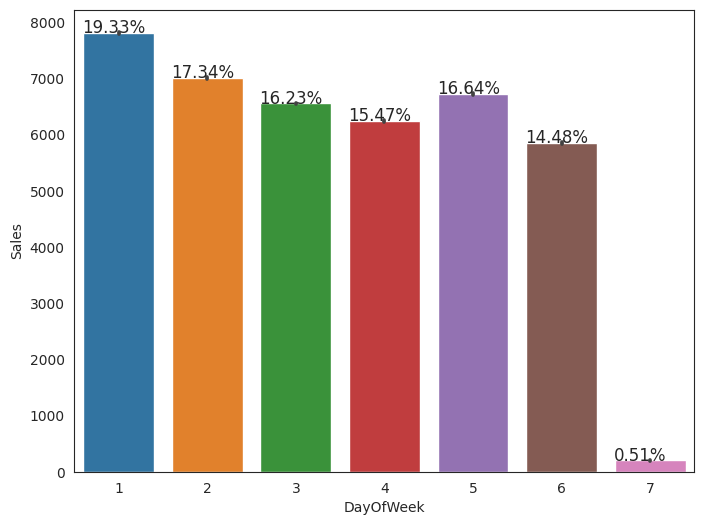

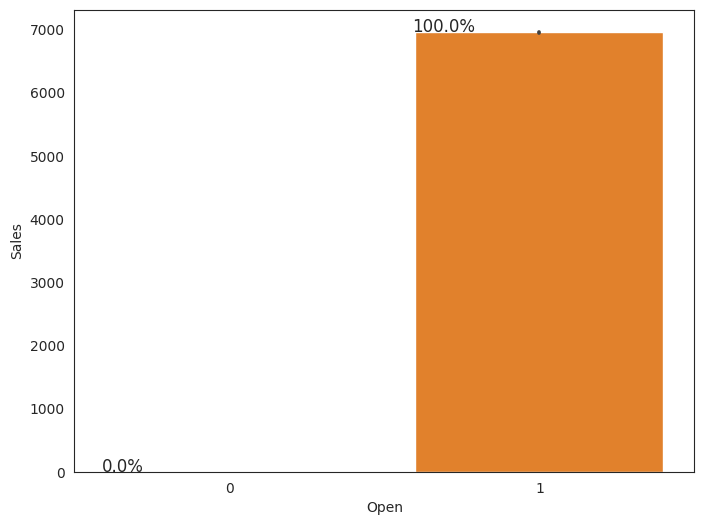

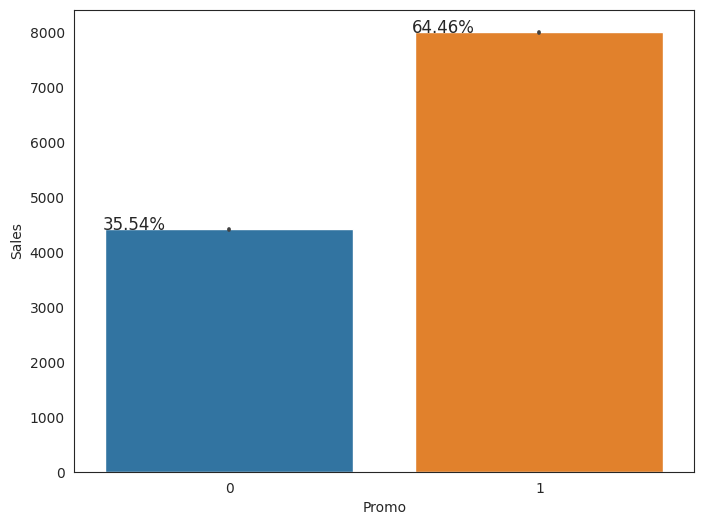

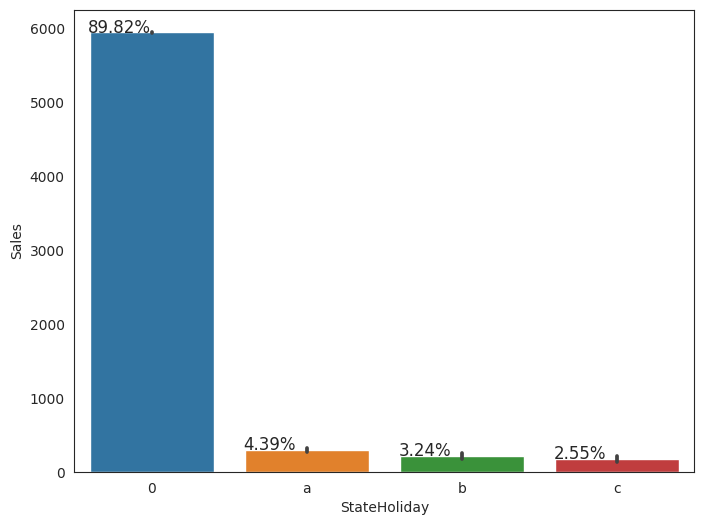

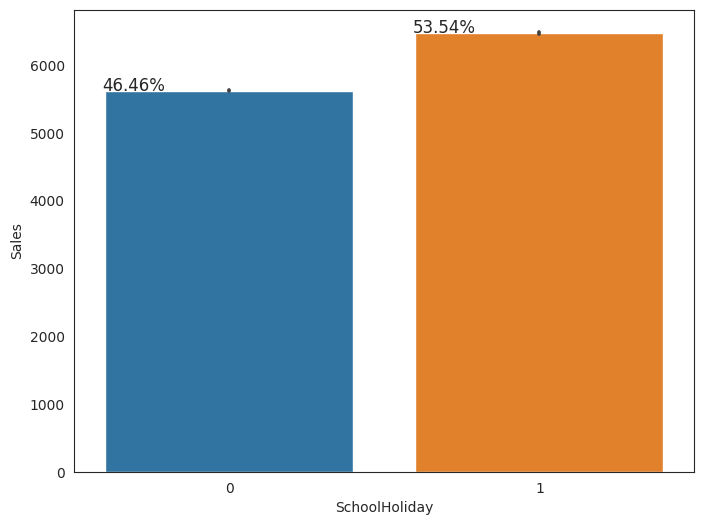

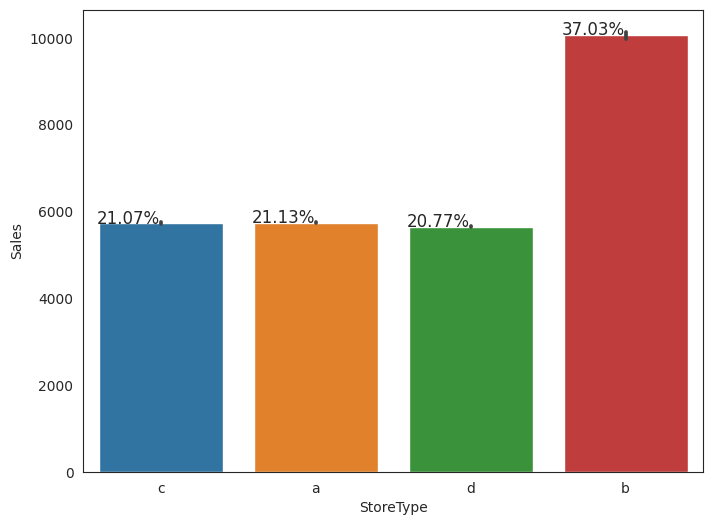

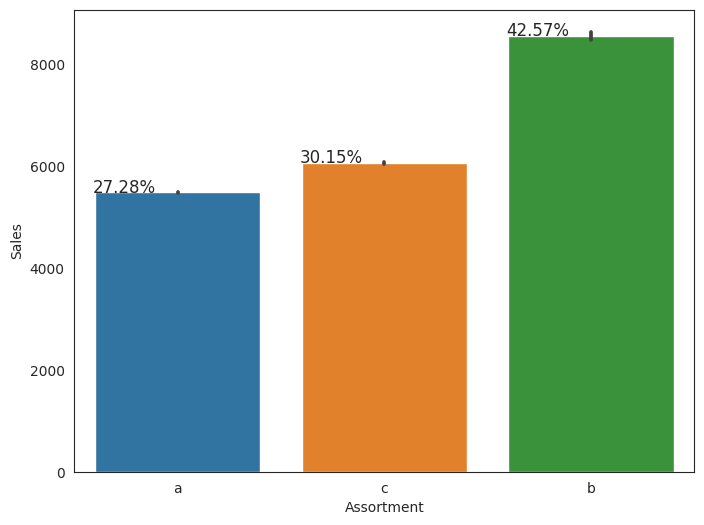

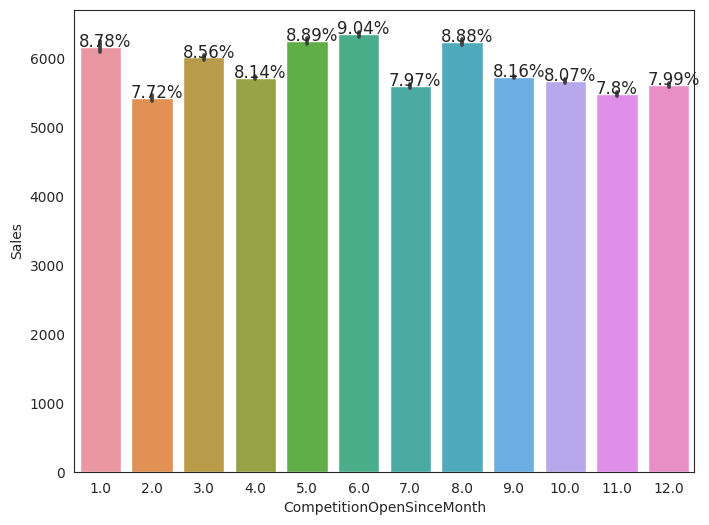

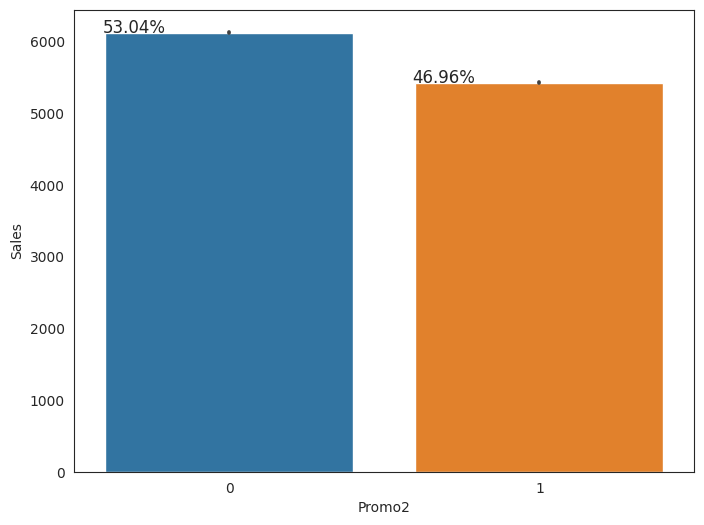

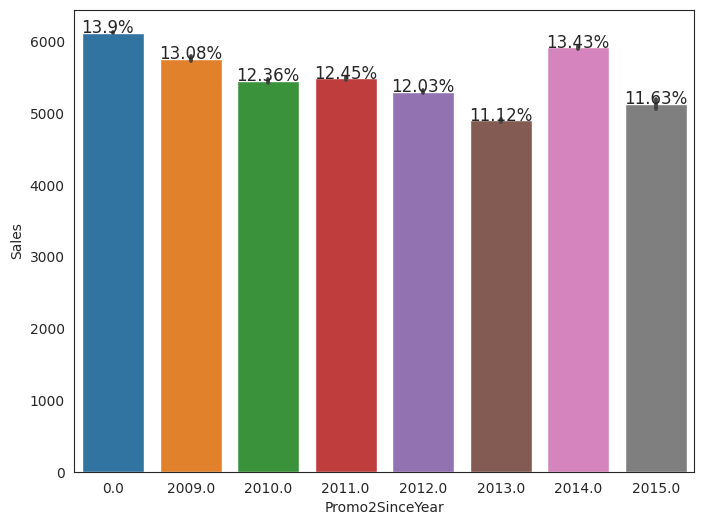

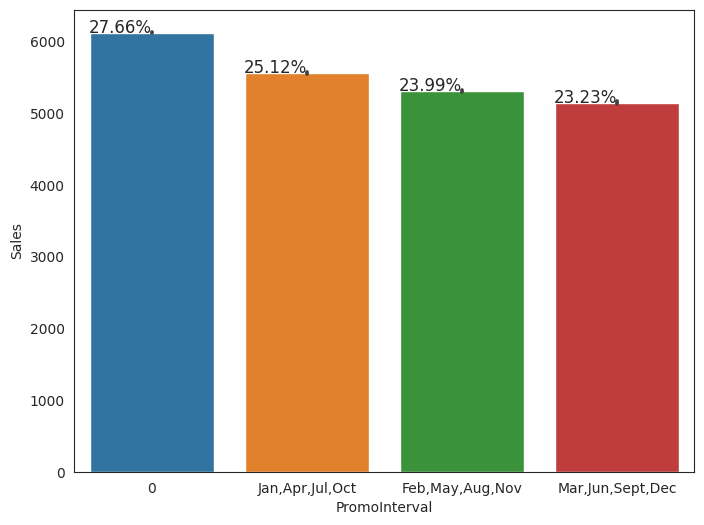

In [30]:
# Chart - 1 Visualization code
# Code for barplots of the categorical variables against sales
# Iterating over the categorical variables and plotting each of them

plt.rcParams['figure.figsize'] = (8, 6)

categorical_variables = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment',
                         'CompetitionOpenSinceMonth','Promo2','Promo2SinceYear','PromoInterval']
for value in categorical_variables:
  ax = sns.barplot(x=df[value], y=df['Sales']) 
  totals = []
  for i in ax.patches: #for every patch in the barplot ax
      totals.append(i.get_height()) #append height for each patch

  total = sum(totals) #sum of each patch height for a plot

  for i in ax.patches:  
      ax.text(i.get_x() - .01, i.get_height() + .5, \
              str(round((i.get_height()/total)*100, 2))+'%', fontsize=12)  #text position and formula for percentage
  plt.show()

#### 1. Why did you pick the specific chart?

Bar plots are commonly used for checking the relationship between categorical features and a target variable in a prediction model because they provide a clear visual representation of the count or proportion of observations in each category. The length of each bar represents the frequency or percentage of observations in each category. By looking at a bar plot, it's easy to see which categories have high or low frequencies and to identify patterns or trends in the data.
     This can help you to understand which categories are important for the prediction task and how they are related to the target variable.

Overall, bar plots are a simple and effective way to visualize the relationship between categorical features and the target variable in a prediction model, and they provide valuable information that can be used to guide the modeling process.

#### 2. What is/are the insight(s) found from the chart?

*  There were more sales on Monday, probably because shops generally remain closed on Sundays.
* It could be seen that the Promo leads to more sales.
* Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None. Lowest of Sales were seen on state holidays especially on Christmas.
* More stores were open on School Holidays than on State Holidays and hence had more sales than State Holidays.
* On an average Store type B had the highest sales.
* Highest average sales were seen with Assortment levels-b which is 'extra'.
* With Promo2, slightly more sales were seen without it which indicates there are many stores not participating in promo.

#### 3. Will the gained insights help creating a positive business impact? 
#### Are there any insights that lead to negative growth? Justify with specific reason.




Yes, the gained insights can help create a positive business impact. The insights suggest that running promotions and staying open on school holidays can lead to higher sales, which can be used by businesses to increase their revenue. Additionally, understanding which store types and assortment levels have the highest sales can help businesses focus their marketing efforts on those products and improve their profitability.

The insight that sales are lower on state holidays, especially on Christmas, can lead to negative growth for businesses that rely on these holidays for revenue. If a business is closed on these days, they may miss out on potential sales and lose customers to competitors who remain open. However, this can also be an opportunity for businesses to differentiate themselves by providing unique experiences or promotions on these holidays, potentially leading to increased sales and customer loyalty.

#### Chart - 2  : Open and storetype relationship 

<Axes: xlabel='Open', ylabel='Sales'>

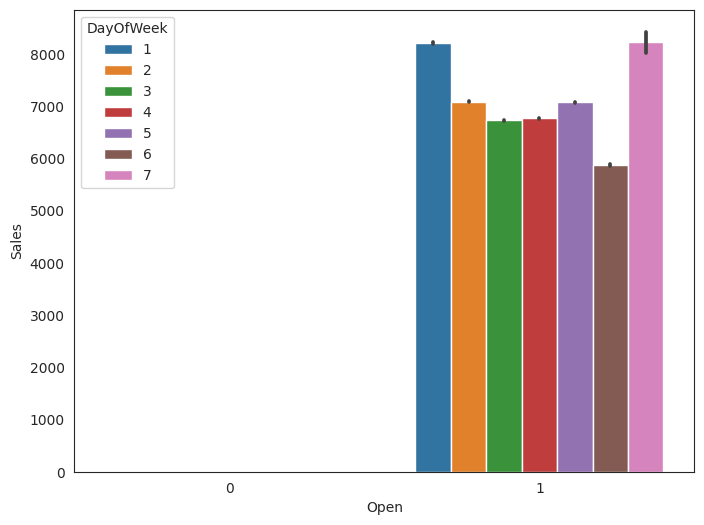

In [31]:
# Chart - 2 Visualization code
# Open and storetype relationship 
# This indicates - Open suggests that whether the store was open or closed for refurbishment and weekends or holidays
plt.rcParams['figure.figsize'] = (8, 6)
sns.barplot(x=df["Open"],y=df['Sales'],hue=df["DayOfWeek"])

<Axes: xlabel='Open', ylabel='count'>

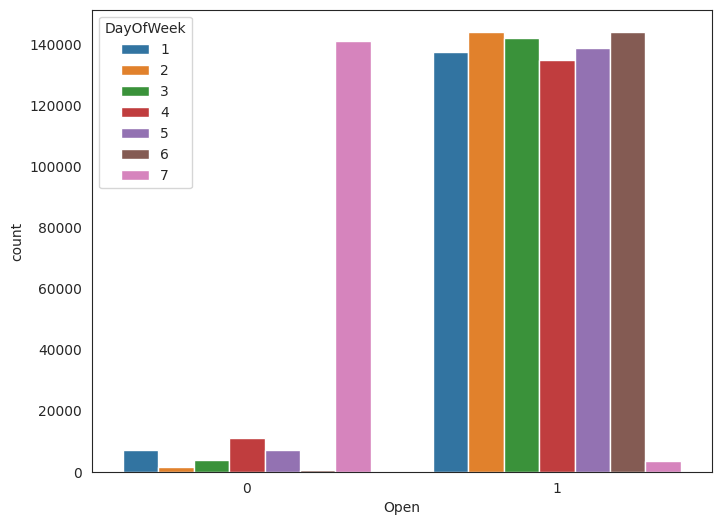

In [32]:
# Lets see open, how many shops are open on which days 
# And this gives a counts of stores closed for refurbishment and suggests that most stores are closed on sunday
plt.rcParams['figure.figsize'] = (8, 6)
sns.countplot(x=df["Open"], hue=df["DayOfWeek"])

#### 1. Why did you pick the specific chart?

 Bar plots are a simple and effective way to visualize the relationship between categorical features and the target variable in a prediction model and they provide valuable information that can be used to guide the modeling process.

#### 2. What is/are the insight(s) found from the chart?

This is a count plot of open shops according to the day of the week. It's clear that the number of shops open on Sundays were very less and hence low sales. Some shops were closed on weekdays as well accounting to the stores closed due to refurbishment or holidays.

#### 3. Will the gained insights help creating a positive business impact? 
#### Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can help to create a positive business impact by indicating that opening stores on Sundays can potentially lead to increased sales. It can also assist in determining when stores should be closed for refurbishment or holidays in order to minimise sales loss.



There are no insights that lead to negative growth because the data only highlights the number of open shops on each day of the week and has no negative impact on the business. However, if the reason for the shops being closed on certain days is a lack of staff or other operational issues, it could potentially lead to negative growth if not addressed properly.

#### Chart - 3 : According to store type

<Axes: xlabel='StoreType', ylabel='Sales'>

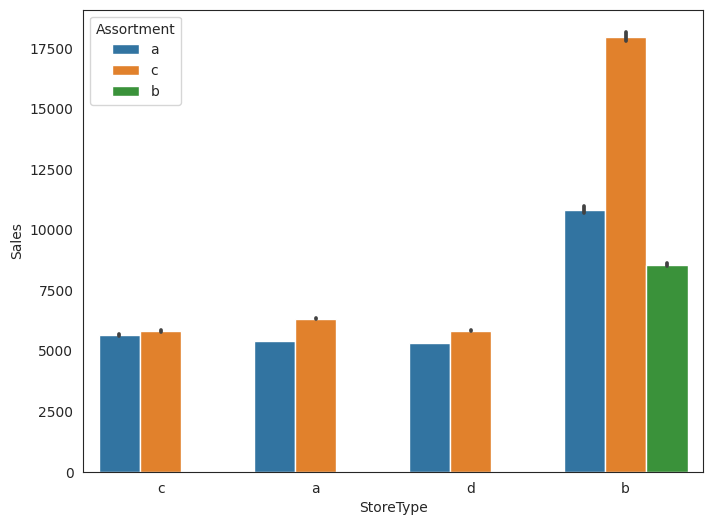

In [33]:
# Chart - 3 Visualization code
# Let's check the relationship between store type, assortment levels and sales
plt.rcParams['figure.figsize'] = (8, 6)
sns.barplot(x=df["StoreType"],y=df['Sales'],hue=df["Assortment"])

#### 1. Why did you pick the specific chart?

Bar plots are simple and effective way to visualize the relationship between categorical features and the target variable in a prediction model and they provide valuable information that can be used to guide the modeling process.
Also here for visualising as per Assortment.

#### 2. What is/are the insight(s) found from the chart?

The above bar plot shows that the store types a, c and d have only assortment level a and c. On the other hand the store type b has all the three kinds of assortment strategies, a reason why average sales were high for store type b stores.

#### 3. Will the gained insights help creating a positive business impact? 
#### Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights can help create a positive business impact by understanding the relationship between store types and assortment levels, businesses can make informed decisions on how to stock and market their products to better meet the needs and preferences of their target customers. For example, if store type b stores have higher average sales, businesses may consider increasing the number of stores with that store type and assortment level to capitalize on the potential for higher sales.

There are no insights that directly lead to negative growth in this case. However, businesses may face challenges if they are unable to stock the appropriate assortment levels in their stores due to supply chain issues or other factors. Additionally, if businesses only focus on increasing the number of store type b stores without considering other factors such as location and target customer demographics, they may not see the desired increase in sales and could potentially experience negative growth.

#### Chart - 4  : Explore according to store type and sales

In [34]:
# Store Type and Sales Exploration
store_type = df.groupby("StoreType")["Sales","Customers"].sum().reset_index()
store_type.sort_values(["Sales","Customers"], ascending= False, inplace = True) # sorting into descending order to get higher values
store_type

,StoreType,Sales,Customers
0,a,3165334859,363541434
3,d,1765392943,156904995
2,c,783221426,92129705
1,b,159231395,31465621


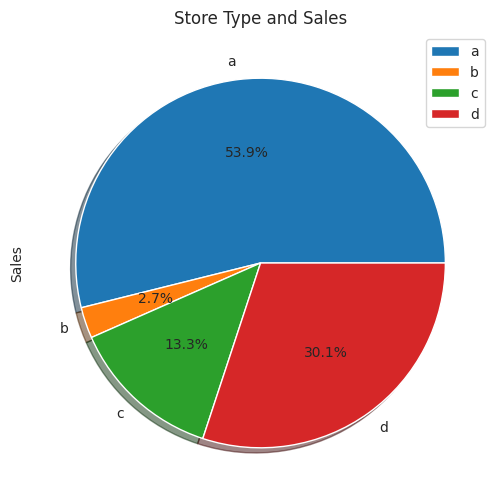

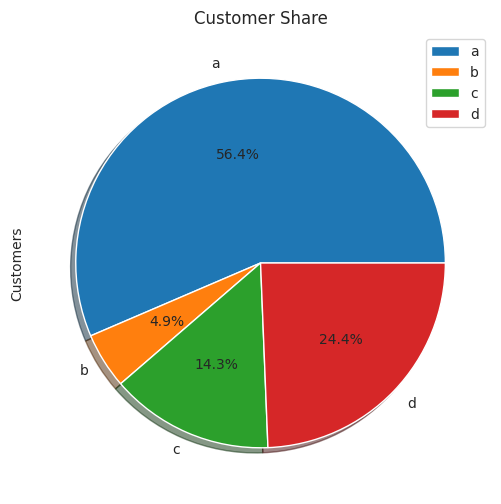

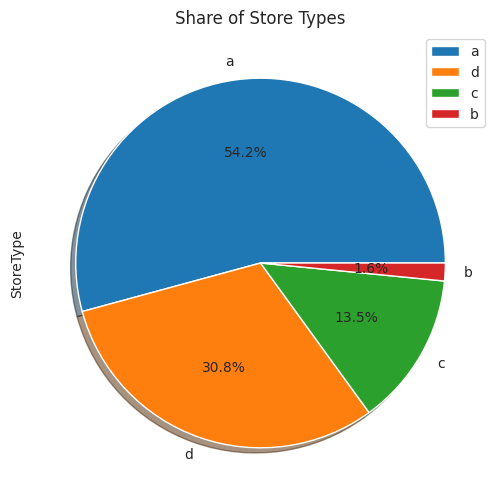

In [35]:
# Chart - 4 Visualization code
# Let's explore store type a bit and it's influence on sales
plt.rcParams['figure.figsize'] = (8, 6)
df.groupby("StoreType")["Sales"].sum().plot.pie(title='Store Type and Sales', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()
# Customers and store type
df.groupby("StoreType")["Customers"].sum().plot.pie(title='Customer Share', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()
# Store types in all of the dataset
df["StoreType"].value_counts().plot.pie(title='Share of Store Types', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()

#### 1. Why did you pick the specific chart?

   Pie charts are used to visualize the types of a variable when the variable has a limited number of categories, and the goal is to show the proportion or percentage of observations that belong to each category. Pie charts are particularly useful when the number of categories is small, typically between 2 and 6, as they provide an easy-to-read representation of the distribution of the data.
   
   Overall, pie charts are a simple and effective way to visualize the types of a variable when the variable has a limited number of categories, and the goal is to show the proportion of observations that belong to each category.

#### 2. What is/are the insight(s) found from the chart?

* A bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle. Earlier it was seen that the store type b had the highest sales on an average because the default estimation function to the barplot is mean. 
* But upon further exploration it can be clearly observed that the highest sales belonged to the store type a due to the high number of type a stores in our dataset. Store type a and c had a similar kind of sales and customer share.
* Interesting insight to note is that store type b with highest average sales and per store revenue generation looks healthy and a reason for that would be all three kinds of assortment strategies involved which was seen earlier.

#### 3. Will the gained insights help creating a positive business impact? 
#### Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can help create a positive business impact as it provides valuable information about the sales and revenue generation of different store types and assortment strategies. This information can be used by the business to make informed decisions regarding their product offerings, marketing strategies, and store operations.

There are no signs that lead to negative growth.

###Continuous Features:

#### Chart - 5  : Sales with Time

In [36]:
# Chart - 5 Visualization code
# Sales over the years
sales_df_2013 = df[df['Year']== 2013]
sales_df_2014 = df[df['Year']==2014]
sales_df_2015 = df[df['Year']== 2015]

In [37]:
# Monthly sales
sales_2013 = sales_df_2013.groupby('Month')['Sales'].sum().reset_index()
sales_2014 = sales_df_2014.groupby('Month')['Sales'].sum().reset_index()
sales_2015 = sales_df_2015.groupby('Month')['Sales'].sum().reset_index()

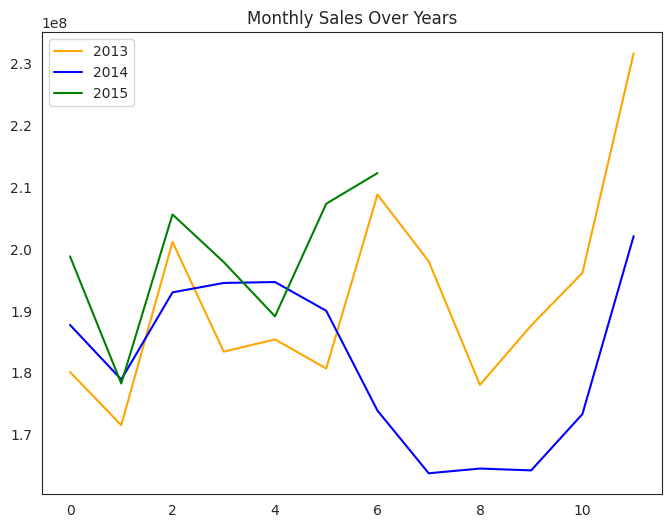

In [38]:
# Plotting
plt.rcParams['figure.figsize'] = (8, 6)
plt.plot(sales_2013.loc[:,'Sales'],label='2013',color='orange')
plt.plot(sales_2014.loc[:,'Sales'],label='2014',color='blue')
plt.plot(sales_2015.loc[:,'Sales'],label='2015',color='green')
plt.title('Monthly Sales Over Years')
plt.legend()

#### 1. Why did you pick the specific chart?

Line charts are commonly used to compare a time variable in analysis because they provide an effective way to visualize how a variable changes over time. Line charts are particularly useful when you have a large number of time points and you want to see the overall trend of the data.

   You would plot time (in months or quarters) on the x-axis, and sales on the y-axis. The line chart would show how the sales of the product change over time, making it easy to see the overall trend of the data and identify any patterns or outliers.

#### 2. What is/are the insight(s) found from the chart?

Sales rise up by the end of the year before the holidays. Sales for 2014 went down there for a couple months - July to September, indicating stores closed due to refurbishment.

#### 3. Will the gained insights help creating a positive business impact? 
#### Are there any insights that lead to negative growth? Justify with specific reason.

The gained insight that sales rise up by the end of the year before the holidays can help businesses plan and prepare for the holiday season, potentially leading to a positive impact on sales.

 However, the insight that sales for 2014 went down for a couple of months due to store refurbishments could lead to a negative impact on sales during that period. Businesses could use this information to plan and schedule refurbishments during times of the year when sales are typically lower to minimize the negative impact.